# Identifying Entities in Healthcare Data

##Workspace set up: Import and Install useful packages.

In [1]:
!pip install pycrf
!pip install sklearn-crfsuite

import spacy
import sklearn_crfsuite
from sklearn_crfsuite import metrics

model = spacy.load("en_core_web_sm")

##Data Preprocessing

The dataset provided is in the form of one word per line. Let's understand the format of data below:
- Suppose there are *x* words in a sentence, then there will be *x* continuous lines with one word in each line. 
- Further, the two sentences are separated by empty lines. The labels for the data follow the same format.

**We need to pre-process the data to recover the complete sentences and their labels.**


### Construct the proper sentences from individual words and print the 5 sentences.

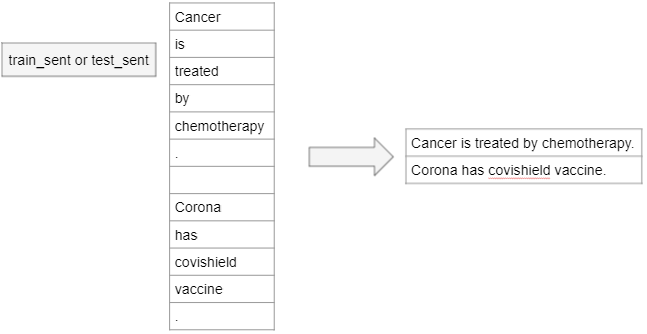

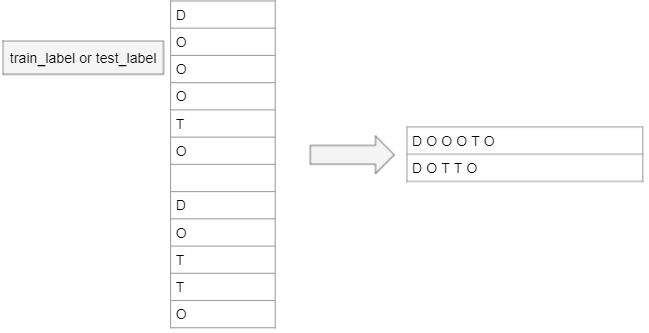

##  Task 1: Data preprocessing

### Opening Files 

In [2]:
## opening files
## train_sentences,train_labels, test_sentences and test_labels are all lists of tokens and corresponding labels
with open('train_sent', 'r') as train_sent_file:
  train_sentences = train_sent_file.readlines()

with open('train_label', 'r') as train_labels_file:
  train_labels = train_labels_file.readlines()

with open('test_sent', 'r') as test_sent_file:
  test_sentences = test_sent_file.readlines()

with open('test_label', 'r') as test_labels_file:
  test_labels = test_labels_file.readlines()

### Constructing proper sentences from individual words

In [3]:
## train_sentences
train_sentences = list(map(lambda x: x.split('\n')[0], train_sentences))
train_sentences = [word for word in train_sentences]
train_sentences = " ".join(train_sentences)
train_sentences = train_sentences.split("  ")
train_sentences[0:5]

['All live births > or = 23 weeks at the University of Vermont in 1995 ( n = 2395 ) were retrospectively analyzed for delivery route , indication for cesarean , gestational age , parity , and practice group ( to reflect risk status )',
 'The total cesarean rate was 14.4 % ( 344 of 2395 ) , and the primary rate was 11.4 % ( 244 of 2144 )',
 'Abnormal presentation was the most common indication ( 25.6 % , 88 of 344 )',
 "The `` corrected '' cesarean rate ( maternal-fetal medicine and transported patients excluded ) was 12.4 % ( 273 of 2194 ) , and the `` corrected '' primary rate was 9.6 % ( 190 of 1975 )",
 "Arrest of dilation was the most common indication in both `` corrected '' subgroups ( 23.4 and 24.6 % , respectively )"]

In [4]:
## test_sentences
test_sentences = list(map(lambda x: x.split('\n')[0], test_sentences))
test_sentences = [word for word in test_sentences]
test_sentences = " ".join(test_sentences)
test_sentences = test_sentences.split("  ")
test_sentences[0:5]

['Furthermore , when all deliveries were analyzed , regardless of risk status but limited to gestational age > or = 36 weeks , the rates did not change ( 12.6 % , 280 of 2214 ; primary 9.2 % , 183 of 1994 )',
 'As the ambient temperature increases , there is an increase in insensible fluid loss and the potential for dehydration',
 'The daily high temperature ranged from 71 to 104 degrees F and AFI values ranged from 1.7 to 24.7 cm during the study period',
 'There was a significant correlation between the 2- , 3- , and 4-day mean temperature and AFI , with the 4-day mean being the most significant ( r = 0.31 , p & # 60 ; 0.001 )',
 'Fluctuations in ambient temperature are inversely correlated to changes in AFI']

In [5]:
## train labels
train_labels = list(map(lambda x: x.split('\n')[0], train_labels))
train_labels = [word for word in train_labels]
train_labels = " ".join(train_labels)
train_labels = train_labels.split("  ")
train_labels[0:5]

['O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O',
 'O O O O O O O O O O O O O O O O O O O O O O O O O',
 'O O O O O O O O O O O O O O O',
 'O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O',
 'O O O O O O O O O O O O O O O O O O O O O O']

In [6]:
## test labels
test_labels = list(map(lambda x: x.split('\n')[0], test_labels))
test_labels = [word for word in test_labels]
test_labels = " ".join(test_labels)
test_labels = test_labels.split("  ")
test_labels[0:5]

['O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O',
 'O O O O O O O O O O O O O O O O O O O',
 'O O O O O O O O O O O O O O O O O O O O O O O O',
 'O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O',
 'O O O O O O O O O O O']

###  Printing five sentences along with their labels.

In [7]:
import pandas as pd

In [8]:
## for training set
pd.set_option("max_colwidth", None)
sent_label_train_df = pd.DataFrame(zip(train_sentences,train_labels),columns=['Sentence','Labels'])
sent_label_train_df.head()

,Sentence,Labels
0,"All live births > or = 23 weeks at the University of Vermont in 1995 ( n = 2395 ) were retrospectively analyzed for delivery route , indication for cesarean , gestational age , parity , and practice group ( to reflect risk status )",O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O
1,"The total cesarean rate was 14.4 % ( 344 of 2395 ) , and the primary rate was 11.4 % ( 244 of 2144 )",O O O O O O O O O O O O O O O O O O O O O O O O O
2,"Abnormal presentation was the most common indication ( 25.6 % , 88 of 344 )",O O O O O O O O O O O O O O O
3,"The `` corrected '' cesarean rate ( maternal-fetal medicine and transported patients excluded ) was 12.4 % ( 273 of 2194 ) , and the `` corrected '' primary rate was 9.6 % ( 190 of 1975 )",O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O
4,"Arrest of dilation was the most common indication in both `` corrected '' subgroups ( 23.4 and 24.6 % , respectively )",O O O O O O O O O O O O O O O O O O O O O O


In [9]:
## for test set
pd.set_option("max_colwidth", None)
sent_label_test_df = pd.DataFrame(zip(test_sentences,test_labels),columns=['Sentence','Labels'])
sent_label_test_df.head()

,Sentence,Labels
0,"Furthermore , when all deliveries were analyzed , regardless of risk status but limited to gestational age > or = 36 weeks , the rates did not change ( 12.6 % , 280 of 2214 ; primary 9.2 % , 183 of 1994 )",O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O
1,"As the ambient temperature increases , there is an increase in insensible fluid loss and the potential for dehydration",O O O O O O O O O O O O O O O O O O O
2,The daily high temperature ranged from 71 to 104 degrees F and AFI values ranged from 1.7 to 24.7 cm during the study period,O O O O O O O O O O O O O O O O O O O O O O O O
3,"There was a significant correlation between the 2- , 3- , and 4-day mean temperature and AFI , with the 4-day mean being the most significant ( r = 0.31 , p & # 60 ; 0.001 )",O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O
4,Fluctuations in ambient temperature are inversely correlated to changes in AFI,O O O O O O O O O O O


### Counting the number of sentences in the processed train and test dataset 

In [10]:
print('Number of sentences in the processsed train dataset:',len(train_sentences))
print('Number of sentences in the processsed train dataset:',len(test_sentences))

Number of sentences in the processsed train dataset: 2599
Number of sentences in the processsed train dataset: 1056


### Counting the number of lines of labels in the processed train and test dataset.

In [11]:
print('Number of lines of labels in the processsed train dataset:',len(train_labels))
print('Number of lines of labels in the processsed train dataset:',len(test_labels))

Number of lines of labels in the processsed train dataset: 2599
Number of lines of labels in the processsed train dataset: 1056


## Concept Identification

We will first explore what are the various concepts present in the dataset. For this, we will use PoS Tagging. 



### Extract those tokens which have NOUN or PROPN as their PoS tag and find their frequency

In [12]:
## getting POS tokens for train_sentences
train_text = []
train_pos = []
for i in range(0,2599):
    doc = model(train_sentences[i])
    for tok in doc:
        train_text.append(tok.text)
        train_pos.append(tok.pos_)
i =i+1

In [13]:
len(train_text),len(train_pos)

(48324, 48324)

In [14]:
## dataframe of train_text tokens and pos
pos_data_train = pd.DataFrame(zip(train_text,train_pos),columns=['Text','PoS'])
pos_data_train.head()

,Text,PoS
0,All,DET
1,live,ADJ
2,births,NOUN
3,>,X
4,or,CCONJ


In [15]:
## getting POS tokens for test_sentences
i = 0
test_text = []
test_pos = []
for i in range(0,len(test_sentences)):
    doc = model(test_sentences[i])
    for tok in doc:
        test_text.append(tok.text)
        test_pos.append(tok.pos_)
i =i+1

In [16]:
## dataframe of test_text tokens and pos
pos_data_test = pd.DataFrame(zip(test_text,test_pos),columns=['Text','PoS'])
pos_data_test.head()

,Text,PoS
0,Furthermore,ADV
1,",",PUNCT
2,when,ADV
3,all,DET
4,deliveries,NOUN


In [17]:
### merging the two datasets
pos_data_merged = pd.concat([pos_data_train,pos_data_test])
pos_data_merged.head()

,Text,PoS
0,All,DET
1,live,ADJ
2,births,NOUN
3,>,X
4,or,CCONJ


### Print the top 25 most common tokens with NOUN or PROPN PoS tags

In [18]:
## selecting only those entries whose PoS is either NOUN or PROPN
df = pd.DataFrame(pos_data_merged[(pos_data_merged['PoS']=="NOUN") | (pos_data_merged['PoS']=="PROPN")].value_counts(),columns=['Count'])
df.head(25)

,,Count
Text,PoS,
patients,NOUN,492
treatment,NOUN,281
%,NOUN,246
cancer,NOUN,200
therapy,NOUN,174
study,NOUN,153
disease,NOUN,141
cell,NOUN,140
lung,NOUN,116


In [83]:
## Converting to dictinary
pos_dict = df['Count'].to_dict()
pos_dict

{('patients', 'NOUN'): 492,
 ('treatment', 'NOUN'): 281,
 ('%', 'NOUN'): 246,
 ('cancer', 'NOUN'): 200,
 ('therapy', 'NOUN'): 174,
 ('study', 'NOUN'): 153,
 ('disease', 'NOUN'): 141,
 ('cell', 'NOUN'): 140,
 ('lung', 'NOUN'): 116,
 ('group', 'NOUN'): 92,
 ('gene', 'NOUN'): 88,
 ('chemotherapy', 'NOUN'): 88,
 ('effects', 'NOUN'): 85,
 ('results', 'NOUN'): 79,
 ('women', 'NOUN'): 77,
 ('TO_SEE', 'PROPN'): 75,
 ('use', 'NOUN'): 74,
 ('risk', 'NOUN'): 71,
 ('cases', 'NOUN'): 71,
 ('surgery', 'NOUN'): 71,
 ('analysis', 'NOUN'): 70,
 ('rate', 'NOUN'): 67,
 ('survival', 'NOUN'): 65,
 ('response', 'NOUN'): 65,
 ('children', 'NOUN'): 64,
 ('effect', 'NOUN'): 63,
 ('cells', 'NOUN'): 61,
 ('patient', 'NOUN'): 60,
 ('dose', 'NOUN'): 59,
 ('protein', 'NOUN'): 59,
 ('years', 'NOUN'): 58,
 ('term', 'NOUN'): 57,
 ('combination', 'NOUN'): 57,
 ('age', 'NOUN'): 56,
 ('care', 'NOUN'): 56,
 ('data', 'NOUN'): 54,
 ('studies', 'NOUN'): 53,
 ('activity', 'NOUN'): 53,
 ('carcinoma', 'NOUN'): 51,
 ('health', '

In [89]:
## printing top25
top_25 = list(pos_dict.items())[:25]
print(top_25)

[(('patients', 'NOUN'), 492), (('treatment', 'NOUN'), 281), (('%', 'NOUN'), 246), (('cancer', 'NOUN'), 200), (('therapy', 'NOUN'), 174), (('study', 'NOUN'), 153), (('disease', 'NOUN'), 141), (('cell', 'NOUN'), 140), (('lung', 'NOUN'), 116), (('group', 'NOUN'), 92), (('gene', 'NOUN'), 88), (('chemotherapy', 'NOUN'), 88), (('effects', 'NOUN'), 85), (('results', 'NOUN'), 79), (('women', 'NOUN'), 77), (('TO_SEE', 'PROPN'), 75), (('use', 'NOUN'), 74), (('risk', 'NOUN'), 71), (('cases', 'NOUN'), 71), (('surgery', 'NOUN'), 71), (('analysis', 'NOUN'), 70), (('rate', 'NOUN'), 67), (('survival', 'NOUN'), 65), (('response', 'NOUN'), 65), (('children', 'NOUN'), 64)]


## Defining features for CRF





In [19]:
# Let's # Let's define the features to get the feature value for one word.
## pos : postion of a word
def getFeaturesForOneWord(sentence, pos):
  word = sentence[pos]
  doc = model(word)
  doc_prev = model(sentence[pos-1])
  features = [
    'word.PoS=' + [tok.pos_ for tok in doc][0],# POS tag of the token
    'word.lower=' + word.lower(), # serves as word id
    'word[-3:]=' + word[-3:],     # last three characters
    'word[-2:]=' + word[-2:],     # last two characters
    'word.isupper=%s' % word.isupper(),  # is the word in all uppercase
    'word.isdigit=%s' % word.isdigit(),  # is the word a number
    'words.startsWithCapital=%s' % word[0].isupper() # is the word starting with a capital letter
  ]

  if(pos > 0):
    prev_word = sentence[pos-1]
    features.extend([
    'prev_word.PoS=' + [tok.pos_ for tok in doc_prev][0],
    'prev_word.lower=' + prev_word.lower(),
    'prev_word.isupper=%s' % prev_word.isupper(),
    'prev_word.isdigit=%s' % prev_word.isdigit(),
    'prev_words.startsWithCapital=%s' % prev_word[0].isupper()
  ])
  else:
    features.append('BEG') # feature to track begin of sentence 

  if(pos == len(sentence)-1):
    features.append('END') # feature to track end of sentence

  return features


## Getting the features

### Write a code/function to get the features for a sentence

In [20]:
# Write a code to get the labels for a sentence.
# Define a function to get features for a sentence 
# using the 'getFeaturesForOneWord' function.
def getFeaturesForOneSentence(sentence):
  sentence_list = sentence.split()
  return [getFeaturesForOneWord(sentence_list, pos) for pos in range(len(sentence_list))]

### Write a code/function to get the labels of a sentence

In [21]:
# Write a code to get the labels for a sentence.
## to ensure one-to-one correspomdence between the words and the labels
def getLabelsInListForOneSentence(labels):
  return labels.split()

In [22]:
# Apply function 'getFeaturesForOneSentence' to get features on a single sentence which is at index value 20 in train_sentences
example_sentence = train_sentences[20]
print(example_sentence)
example_label = train_labels[20]
print(example_label)
## lets see how the values for word 21 are
features = getFeaturesForOneSentence(example_sentence)
features[20]

Down syndrome ( 12 cases ) and Edward syndrome ( 11 cases ) were the most common trisomies , while 4 cases of Patau syndrome were also diagnosed
D D O O O O O D D O O O O O O O O D O O O O O D D O O O


['word.PoS=NUM',
 'word.lower=4',
 'word[-3:]=4',
 'word[-2:]=4',
 'word.isupper=False',
 'word.isdigit=True',
 'words.startsWithCapital=False',
 'prev_word.PoS=SCONJ',
 'prev_word.lower=while',
 'prev_word.isupper=False',
 'prev_word.isdigit=False',
 'prev_words.startsWithCapital=False']

## Define input and target variables


Correctly computing X and Y sequence matrices for training and test data.
Check that both sentences and labels are processed

### Define the features' values for each sentence as input variable  for CRF model in test and the train dataset 

In [23]:
X_train = [getFeaturesForOneSentence(sentence) for sentence in train_sentences]
X_test = [getFeaturesForOneSentence(sentence) for sentence in test_sentences]

### Define the labels as the target variable for test and the train dataset

In [24]:
Y_train = [getLabelsInListForOneSentence(labels) for labels in train_labels]
Y_test = [getLabelsInListForOneSentence(labels) for labels in test_labels]

## Build the CRF Model

In [25]:
# Build the CRF model
## building model with 200 iterations
crf = sklearn_crfsuite.CRF(max_iterations=200)
crf.fit(X_train, Y_train)

/Users/abhinavjoshi/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '


CRF(keep_tempfiles=None, max_iterations=200)

## Evaluation

### Predict the labels of each of the tokens in each sentence of the test dataset that has been pre processed earlier.

In [26]:
## predictig the labels
Y_pred = crf.predict(X_test)

### Calculate the f1 score using the actual labels and the predicted labels of the test dataset.

In [91]:
# getting the f1 score
f1_score = metrics.flat_f1_score(Y_test, Y_pred, average='weighted')
print('The f1 score is :',f1_score)

The f1 score is : 0.9101741968005522


- This score is pretty impressive!

## Identifying Diseases and Treatments using Custom NER

- We now use the CRF model's prediction to prepare a record of diseases identified in the corpus and treatments used for the diseases.



### Create the logic to get all the predicted treatments (T) labels corresponding to each disease (D) label in the test dataset.

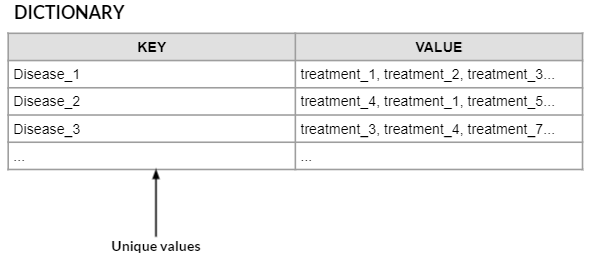

- The exploration of the dataset showed that there are many labels in the test_label list that have only 'O' or only 'O' and 'D' or only 'O' and 'T'.
- Since we are interested in mapping diseases and their corresponding treatments, we will consider only the sentenes which have the correspoding presence of both the labels 'T' and 'D' in their corresponding labels list.

### So the logic that we will take is as follows:
- First, from the Y_pred list that we get from the CRF model for test dataset, we will identify all those labels list which contain both the labels 'T' and 'D'.
- We will make the list of such labels as the new_label_list.
- This new_label_list will have the lenght equal to the lenght of the test_labels list, the only differnece would be that the values for such lists that do not fulfill the above criteria will be null.
- Then we will zip the test_sentence list and the new_label_list to form a dataframe.
- We will drop all the rows which have null value in the labels column. This will leave us with only those sentences and labels which have both treatments and diseases.
- Then we will extract all the disease names using tht tokens list in the dataframe.
- Finally we will remove all the duplicate disease names and get the corresponding treatments for each disease

In [28]:
## creating sentences  list 
sent_list = []
for i in range(0,len(test_sentences)):
    sent_list.append(test_sentences[i].split())
i = i+1
sent_list[0:2]

[['Furthermore',
  ',',
  'when',
  'all',
  'deliveries',
  'were',
  'analyzed',
  ',',
  'regardless',
  'of',
  'risk',
  'status',
  'but',
  'limited',
  'to',
  'gestational',
  'age',
  '>',
  'or',
  '=',
  '36',
  'weeks',
  ',',
  'the',
  'rates',
  'did',
  'not',
  'change',
  '(',
  '12.6',
  '%',
  ',',
  '280',
  'of',
  '2214',
  ';',
  'primary',
  '9.2',
  '%',
  ',',
  '183',
  'of',
  '1994',
  ')'],
 ['As',
  'the',
  'ambient',
  'temperature',
  'increases',
  ',',
  'there',
  'is',
  'an',
  'increase',
  'in',
  'insensible',
  'fluid',
  'loss',
  'and',
  'the',
  'potential',
  'for',
  'dehydration']]

In [29]:
## creating label list
## here the label list will be the lables predicted by the crf model
label_list = crf.predict(X_test)
label_list[0:2]

[['O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O'],
 ['O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O']]

In [30]:
## creating a function to fiter out only those entries in the test_label list that have both 'T' and 'D'
def filter_list(mylist):
    if mylist.count('D')!=0 and mylist.count('T')!=0:
        return mylist
    else:
        pass

In [31]:
# filtering the test_labels list
new_label_list = [filter_list(label) for label in label_list]
len(new_label_list)

1056

In [32]:
## creating dataframe
import pandas as pd
my_df = pd.DataFrame(zip(sent_list,new_label_list),columns=['sentence','labels'])
my_df.head()

,sentence,labels
0,"[Furthermore, ,, when, all, deliveries, were, analyzed, ,, regardless, of, risk, status, but, limited, to, gestational, age, >, or, =, 36, weeks, ,, the, rates, did, not, change, (, 12.6, %, ,, 280, of, 2214, ;, primary, 9.2, %, ,, 183, of, 1994, )]",None
1,"[As, the, ambient, temperature, increases, ,, there, is, an, increase, in, insensible, fluid, loss, and, the, potential, for, dehydration]",None
2,"[The, daily, high, temperature, ranged, from, 71, to, 104, degrees, F, and, AFI, values, ranged, from, 1.7, to, 24.7, cm, during, the, study, period]",None
3,"[There, was, a, significant, correlation, between, the, 2-, ,, 3-, ,, and, 4-day, mean, temperature, and, AFI, ,, with, the, 4-day, mean, being, the, most, significant, (, r, =, 0.31, ,, p, &, #, 60, ;, 0.001, )]",None
4,"[Fluctuations, in, ambient, temperature, are, inversely, correlated, to, changes, in, AFI]",None


In [33]:
my_df.shape

(1056, 2)

In [34]:
## dropping null values
pd.set_option('max_colwidth',None)
my_df= my_df.dropna()
my_df.head()

,sentence,labels
46,"[<, TO_SEE, >, CONTEXT, :, There, is, a, substantial, risk, of, a, second, cancer, for, persons, with, hereditary, retinoblastoma, ,, which, is, enhanced, by, radiotherapy]","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, D, D, O, O, O, O, O, T]"
61,"[CONCLUSION, :, Methylphenidate, is, effective, in, treating, children, with, epilepsy, and, ADHD, and, safe, in, children, who, are, seizure, free]","[O, O, T, O, O, O, O, O, O, D, O, O, O, O, O, O, O, O, O, O]"
71,"[METHODS, :, The, effect, of, roxithromycin, was, assessed, in, a, double-blind, ,, randomised, ,, prospective, ,, multicentre, ,, parallel-group, ,, placebo-controlled, pilot, study, of, 202, patients, with, unstable, angina, or, non-Q-wave, myocardial, infarction]","[O, O, O, O, O, T, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, D, D, D, D, D, D]"
73,"[INTERPRETATION, :, Antichlamydial, antibiotics, may, be, useful, in, therapeutic, intervention, in, addition, to, standard, medication, in, patients, with, coronary-artery, disease]","[O, O, T, T, O, O, O, O, O, O, O, O, O, O, O, O, O, O, D, D]"
115,"[Our, purpose, was, to, systematically, review, data, on, brain, serotonin, neurotoxicity, in, animals, treated, with, fenfluramines, and, the, evidence, linking, fenfluramines, to, primary, pulmonary, hypertension, (, PPH, )]","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, T, O, O, O, O, O, O, D, D, D, D, D, D]"


In [35]:
## resetting index
my_df = my_df.reset_index()

In [36]:
## checking shape
my_df.shape

(120, 3)

####  Extracting sentence list and labels list from the dataframe

In [37]:
## list of sentences
new_sent_list = my_df['sentence'].tolist()
len(new_sent_list)

120

In [38]:
## list of labels
new_label_list = my_df['labels'].tolist()
len(new_label_list)

120

In [39]:
## extracting strings containing all the disease names and the treatments
i = 0
j = 0
treatments = ''
diseases = ''
for i in range (0,len(new_sent_list)):
    for j in range(0,len(new_sent_list[i])):
    
        if new_label_list[i][j]=="D":
            diseases = diseases +' '+ new_sent_list[i][j]
        elif new_label_list[i][j]=="T":
            treatments = treatments +' '+ new_sent_list[i][j]
    
        else:
            pass
    j = j+1       
    diseases = diseases + 'XXX'
    treatments = treatments + 'XXX'    
i = i+1

In [40]:
treatments

' radiotherapyXXX MethylphenidateXXX roxithromycinXXX Antichlamydial antibioticsXXX fenfluraminesXXX moxonidineXXX G-CSF therapy intravenous antibiotic treatmentXXX G-CSF treatmentXXX double-bolus alteplaseXXX Ropinirole monotherapyXXX AntibioticsXXX steroidsXXX surgical treatmentXXX intrauterine insemination with donor sperm versus intrauterine inseminationXXX organ transplantation and chemotherapyXXX Thrombolytic treatment right-side hemodynamicsXXX thoracotomy , radiotherapy , and chemotherapyXXX chemotherapyXXX testicular fine needle aspiration ( TEFNA ) open biopsy and testicular sperm extraction ( TESE )XXX Elective surgeryXXX Elective surgeryXXX Microelectrode-guided posteroventral pallidotomyXXX RadiotherapyXXX laparoscopic cholecystectomyXXX adjuvant chemoradiotherapy with CDDPXXX Hormone replacement therapyXXX TrisomyXXX chemotherapyXXX adenovirus-mediated interleukin 12 ( il-12 ) gene therapyXXX surgeryXXX combination with leucovorin or cisplatinXXX topical corticosteroidsXX

In [41]:
## list of disease names
a = diseases.split('XXX')
disease_list = []
for i in range(0,len(a)):
    if a[i]=='':
        pass
    else:
        disease_list.append(a[i].lower())

In [42]:
disease_list[0:5]

[' hereditary retinoblastoma',
 ' epilepsy',
 ' unstable angina or non-q-wave myocardial infarction',
 ' coronary-artery disease',
 ' primary pulmonary hypertension ( pph )']

In [43]:
len(disease_list)

120

In [44]:
## treatments list
b = treatments.split('XXX')
treatments_list = []
for i in range(0,len(b)):
    if b[i]=='':
        pass
    else:
        treatments_list.append(b[i].lower())

In [45]:
## list of treatment names
treatments_list[0:5]

[' radiotherapy',
 ' methylphenidate',
 ' roxithromycin',
 ' antichlamydial antibiotics',
 ' fenfluramines']

In [46]:
len(treatments_list)

120

In [47]:
## creating final dataframe
final_df = pd.DataFrame(zip(disease_list,treatments_list),columns=['disease','treatment'])
final_df.head()

,disease,treatment
0,hereditary retinoblastoma,radiotherapy
1,epilepsy,methylphenidate
2,unstable angina or non-q-wave myocardial infarction,roxithromycin
3,coronary-artery disease,antichlamydial antibiotics
4,primary pulmonary hypertension ( pph ),fenfluramines


### Extracting unique disease names and corresponding treatments

In [48]:
## checking unique values
final_df['disease'].value_counts()

 cancer                                         3
 small-cell lung cancer                         3
 colorectal cancer                              2
 breast cancer                                  2
 partial seizures                               2
                                               ..
 limited stage small cell lung cancer           1
 hepatic metastases from colorectal cancer      1
 metastatic colorectal cancer                   1
 primary sclerosing cholangitis ( psc )         1
 melanoma ovarian carcinoma brain metastasis    1
Name: disease, Length: 111, dtype: int64

In [49]:
## identifying rows with disease as cancer
final_df[final_df['disease']==' cancer']

,disease,treatment
81,cancer,immunotherapy
86,cancer,oral drugs chemotherapy
114,cancer,matrix metalloproteinase inhibitors


In [50]:
## dropping those rows
final_df = final_df.drop(index=[81,86,114])
## creating dictionary of disease with all treatments
cancer_df = {'disease':' cancer',
             'treatment':[' immunotherapy',' oral drugs chemotherapy',' matrix metalloproteinase inhibitors']}
## adding dict to dataframe
final_df = final_df.append(cancer_df,ignore_index=True)
final_df.tail()

,disease,treatment
113,severe secondary peritonitis,surgical management
114,hepatic metastases from colorectal cancer,hepatic arterial infusion of chemotherapy
115,chronic renal failure,epoetin
116,epithelial ovarian cancer,high-dose chemotherapy
117,cancer,"[ immunotherapy, oral drugs chemotherapy, matrix metalloproteinase inhibitors]"


In [51]:
## checking value counts
final_df['disease'].value_counts()

 small-cell lung cancer                         3
 multiple sclerosis                             2
 breast cancer                                  2
 bronchiectasis                                 2
 colorectal cancer                              2
                                               ..
 limited stage small cell lung cancer           1
 hepatic metastases from colorectal cancer      1
 metastatic colorectal cancer                   1
 primary sclerosing cholangitis ( psc )         1
 melanoma ovarian carcinoma brain metastasis    1
Name: disease, Length: 111, dtype: int64

In [52]:
## identifying rows with small-cell lung cancer
final_df[final_df['disease']==' small-cell lung cancer']

,disease,treatment
38,small-cell lung cancer,chemotherapy
54,small-cell lung cancer,combination chemotherapy
56,small-cell lung cancer,paclitaxel plus carboplatin ( pc ) vinorelbine plus cisplatin ( vc )


In [53]:
## removing multiple entries for small-cell lung cancer
final_df = final_df.drop(index=[38,54,56])
small_cell_lung_cancer_df = {'disease':' small-cell lung cancer',
                             'treatment':[' chemotherapy',' combination chemotherapy',' paclitaxel plus carboplatin ( pc ) vinorelbine plus cisplatin ( vc )']}
final_df = final_df.append(small_cell_lung_cancer_df,ignore_index=True)
final_df.tail()

,disease,treatment
111,hepatic metastases from colorectal cancer,hepatic arterial infusion of chemotherapy
112,chronic renal failure,epoetin
113,epithelial ovarian cancer,high-dose chemotherapy
114,cancer,"[ immunotherapy, oral drugs chemotherapy, matrix metalloproteinase inhibitors]"
115,small-cell lung cancer,"[ chemotherapy, combination chemotherapy, paclitaxel plus carboplatin ( pc ) vinorelbine plus cisplatin ( vc )]"


In [54]:
## checking value counts
final_df['disease'].value_counts()

 multiple sclerosis                             2
 colorectal cancer                              2
 bronchiectasis                                 2
 partial seizures                               2
 breast cancer                                  2
                                               ..
 limited stage small cell lung cancer           1
 hepatic metastases from colorectal cancer      1
 metastatic colorectal cancer                   1
 primary sclerosing cholangitis ( psc )         1
 melanoma ovarian carcinoma brain metastasis    1
Name: disease, Length: 111, dtype: int64

In [55]:
## identifying rows with  multiple sclerosis
final_df[final_df['disease']==' multiple sclerosis']

,disease,treatment
104,multiple sclerosis,interferon beta treatment
105,multiple sclerosis,intravenous immunoglobulin treatment


In [56]:
# removing mutiple entries for multiple sclerosis
final_df = final_df.drop(index=[104,105])

In [57]:
multiple_sclerosis_df = {'disease':' multiple sclerosis',
             'treatment':[' interferon beta treatment',' intravenous immunoglobulin treatment']}
final_df = final_df.append(multiple_sclerosis_df,ignore_index=True)
final_df.tail()

,disease,treatment
110,chronic renal failure,epoetin
111,epithelial ovarian cancer,high-dose chemotherapy
112,cancer,"[ immunotherapy, oral drugs chemotherapy, matrix metalloproteinase inhibitors]"
113,small-cell lung cancer,"[ chemotherapy, combination chemotherapy, paclitaxel plus carboplatin ( pc ) vinorelbine plus cisplatin ( vc )]"
114,multiple sclerosis,"[ interferon beta treatment, intravenous immunoglobulin treatment]"


In [58]:
## checking value counts
final_df['disease'].value_counts()

 colorectal cancer                              2
 partial seizures                               2
 bronchiectasis                                 2
 breast cancer                                  2
 nsclc                                          1
                                               ..
 limited stage small cell lung cancer           1
 hepatic metastases from colorectal cancer      1
 metastatic colorectal cancer                   1
 primary sclerosing cholangitis ( psc )         1
 melanoma ovarian carcinoma brain metastasis    1
Name: disease, Length: 111, dtype: int64

In [59]:
## identifying rows with bronchiectasis
final_df[final_df['disease']==' bronchiectasis']

,disease,treatment
63,bronchiectasis,antibiotics and surgery
96,bronchiectasis,current surgical therapy


In [60]:
# removing mutiple entries for bronchiectasis
final_df = final_df.drop(index=[63,96])
bronchiectasis_df = {'disease':' bronchiectasis',
                     'treatment':[' antibiotics and surgery',' current surgical therapy']}
final_df = final_df.append(bronchiectasis_df,ignore_index=True)
final_df.tail()

,disease,treatment
109,epithelial ovarian cancer,high-dose chemotherapy
110,cancer,"[ immunotherapy, oral drugs chemotherapy, matrix metalloproteinase inhibitors]"
111,small-cell lung cancer,"[ chemotherapy, combination chemotherapy, paclitaxel plus carboplatin ( pc ) vinorelbine plus cisplatin ( vc )]"
112,multiple sclerosis,"[ interferon beta treatment, intravenous immunoglobulin treatment]"
113,bronchiectasis,"[ antibiotics and surgery, current surgical therapy]"


In [61]:
## checking value counts
final_df['disease'].value_counts()

 colorectal cancer                                   2
 partial seizures                                    2
 breast cancer                                       2
 nsclc                                               1
 cellulitis                                          1
                                                    ..
 advanced stage ( tnm iib-ivb ) mycosis fungoides    1
 limited stage small cell lung cancer                1
 metastatic colorectal cancer                        1
 primary sclerosing cholangitis ( psc )              1
 melanoma ovarian carcinoma brain metastasis         1
Name: disease, Length: 111, dtype: int64

In [62]:
## identifying rows with breast cancer
final_df[final_df['disease']==' breast cancer']

,disease,treatment
25,breast cancer,hormone replacement therapy
76,breast cancer,undergone subcutaneous mastectomy


In [63]:
## removing multiple entries for breast cancer
final_df = final_df.drop(index=[25,76])
breast_cancer_df = {'disease':' breast cancer',
                         'treatment':[' hormone replacement therapy',' undergone subcutaneous mastectomy']}
final_df = final_df.append(breast_cancer_df,ignore_index=True)
final_df.tail()

,disease,treatment
108,cancer,"[ immunotherapy, oral drugs chemotherapy, matrix metalloproteinase inhibitors]"
109,small-cell lung cancer,"[ chemotherapy, combination chemotherapy, paclitaxel plus carboplatin ( pc ) vinorelbine plus cisplatin ( vc )]"
110,multiple sclerosis,"[ interferon beta treatment, intravenous immunoglobulin treatment]"
111,bronchiectasis,"[ antibiotics and surgery, current surgical therapy]"
112,breast cancer,"[ hormone replacement therapy, undergone subcutaneous mastectomy]"


In [64]:
## checking value counts
final_df['disease'].value_counts()

 colorectal cancer                                   2
 partial seizures                                    2
 nsclc                                               1
 cellulitis                                          1
 ventricular tachycardia                             1
                                                    ..
 advanced stage ( tnm iib-ivb ) mycosis fungoides    1
 limited stage small cell lung cancer                1
 metastatic colorectal cancer                        1
 primary sclerosing cholangitis ( psc )              1
 melanoma ovarian carcinoma brain metastasis         1
Name: disease, Length: 111, dtype: int64

In [65]:
## identifying rows with acute partial seizures 
final_df[final_df['disease']==' partial seizures']

,disease,treatment
82,partial seizures,lamotrigine ( ltg )
96,partial seizures,lamotrigine monotherapy


In [66]:
## removing multiple entries for partial seizures 
final_df = final_df.drop(index=[82,96])
partial_seizures_df = {'disease':' partial seizures',
                                  'treatment':[' lamotrigine ( ltg )',' lamotrigine monotherapy']}
final_df = final_df.append(partial_seizures_df,ignore_index=True)
final_df.tail()

,disease,treatment
107,small-cell lung cancer,"[ chemotherapy, combination chemotherapy, paclitaxel plus carboplatin ( pc ) vinorelbine plus cisplatin ( vc )]"
108,multiple sclerosis,"[ interferon beta treatment, intravenous immunoglobulin treatment]"
109,bronchiectasis,"[ antibiotics and surgery, current surgical therapy]"
110,breast cancer,"[ hormone replacement therapy, undergone subcutaneous mastectomy]"
111,partial seizures,"[ lamotrigine ( ltg ), lamotrigine monotherapy]"


In [67]:
## checking value counts
final_df['disease'].value_counts()

 colorectal cancer                                   2
 nsclc                                               1
 cellulitis                                          1
 ventricular tachycardia                             1
 tumors                                              1
                                                    ..
 advanced stage ( tnm iib-ivb ) mycosis fungoides    1
 limited stage small cell lung cancer                1
 metastatic colorectal cancer                        1
 primary sclerosing cholangitis ( psc )              1
 melanoma ovarian carcinoma brain metastasis         1
Name: disease, Length: 111, dtype: int64

In [68]:
## identifying rows with colorectal cancer
final_df[final_df['disease']==' colorectal cancer']

,disease,treatment
19,colorectal cancer,elective surgery
82,colorectal cancer,docosahexanoic acid ( dha ) -concentrated fish oil


In [69]:
## removing multiple entries for colorectal cancer
final_df = final_df.drop(index=[19,82])
colorectal_cancer_df = {'disease':' colorectal cancer',
                        'treatment':[' elective surgery',' docosahexanoic acid ( dha ) -concentrated fish oil']}
final_df = final_df.append(colorectal_cancer_df,ignore_index=True)
final_df.tail()

,disease,treatment
106,multiple sclerosis,"[ interferon beta treatment, intravenous immunoglobulin treatment]"
107,bronchiectasis,"[ antibiotics and surgery, current surgical therapy]"
108,breast cancer,"[ hormone replacement therapy, undergone subcutaneous mastectomy]"
109,partial seizures,"[ lamotrigine ( ltg ), lamotrigine monotherapy]"
110,colorectal cancer,"[ elective surgery, docosahexanoic acid ( dha ) -concentrated fish oil]"


In [70]:
## checking value counts
final_df['disease'].value_counts()

 nsclc                                          1
 cancer                                         1
 malignant melanoma                             1
 esophageal achalasia                           1
 asthma                                         1
                                               ..
 hepatic metastases from colorectal cancer      1
 metastatic colorectal cancer                   1
 primary sclerosing cholangitis ( psc )         1
 biliary dyskinesia                             1
 melanoma ovarian carcinoma brain metastasis    1
Name: disease, Length: 111, dtype: int64

- Now we have mapped different treatments for each unique disease in our dataframe.
- The next setp is to convert this dataframe into a dictionary

#### Converting dataframe to dictionary

In [71]:
final_df.head()

,disease,treatment
0,hereditary retinoblastoma,radiotherapy
1,epilepsy,methylphenidate
2,unstable angina or non-q-wave myocardial infarction,roxithromycin
3,coronary-artery disease,antichlamydial antibiotics
4,primary pulmonary hypertension ( pph ),fenfluramines


In [72]:
## creating dictionary from the dataframe
disease_treatment_dict = final_df.set_index('disease')['treatment'].to_dict()


In [73]:
disease_treatment_dict

{' hereditary retinoblastoma': ' radiotherapy',
 ' epilepsy': ' methylphenidate',
 ' unstable angina or non-q-wave myocardial infarction': ' roxithromycin',
 ' coronary-artery disease': ' antichlamydial antibiotics',
 ' primary pulmonary hypertension ( pph )': ' fenfluramines',
 ' essential hypertension': ' moxonidine',
 ' cellulitis': ' g-csf therapy intravenous antibiotic treatment',
 ' foot infection': ' g-csf treatment',
 ' hemorrhagic stroke': ' double-bolus alteplase',
 " early parkinson 's disease": ' ropinirole monotherapy',
 ' sore throat': ' antibiotics',
 " abdominal tuberculosis crohn 's disease": ' steroids',
 ' female stress urinary incontinence': ' surgical treatment',
 ' preeclampsia ( proteinuric hypertension )': ' intrauterine insemination with donor sperm versus intrauterine insemination',
 ' severe acquired hyperammonemia cancer': ' organ transplantation and chemotherapy',
 ' major pulmonary embolism': ' thrombolytic treatment right-side hemodynamics',
 ' malignant 

### Predict the treatment for the disease name: 'hereditary retinoblastoma'

In [74]:
filt_key = [' hereditary retinoblastoma']

In [82]:
res = list(map(disease_treatment_dict.get, filt_key))
print("The treatment for the disease name 'hereditary retinoblastoma' is",res[0])

The treatment for the disease name 'hereditary retinoblastoma' is  radiotherapy
